In [1]:
import pandas as pd

In [2]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pylab as plt 
%matplotlib inline
import seaborn as sns

In [3]:
from functions import check_nan as ckna

In [4]:
actors = pd.read_csv('../DATA/OLD/actor.csv')
acdf = actors.copy()

In [ ]:
category = pd.read_csv('../DATA/OLD/category.csv')
catdf = category.copy()

In [ ]:
language = pd.read_csv('../DATA/OLD/language.csv')
langdf = language.copy()

In [ ]:
film = pd.read_csv('../DATA/OLD/film.csv')
filmdf = film.copy()

In [ ]:
inventory = pd.read_csv('../DATA/OLD/inventory.csv')
invdf = inventory.copy()

In [ ]:
old_HDD = pd.read_csv('../DATA/OLD/old_HDD.csv')
hdddf = old_HDD.copy()

In [ ]:
rental = pd.read_csv('../DATA/OLD/rental.csv')
rentdf = rental.copy()

We import all the "most wanted" libraries, needed for data cleaning. 
Also, I have imported the functions.py where I have pasted Yona's function to visualy check the Nulls in any Data Frame.

We load all the .csv and name them to be able to take a look at what is inside and start making decisions.

This process I have done it previously and for that reason, we are going to see each one of the .csv separated and with its previous cleaning, but the first thing that I have done has been to load them all and print the first and the last ones to see a little the type of data.

We have a total of 7 data frames that correspond to: ACTORS, CATEGORY, MOVIE, INVENTORY, LANGUAGE, RENTAL AND ONE OLD one with info relevant to the people acting in the film, the title of the film, when it was released and the category.

To create the database for the movie rental company I would like to play a bit with the data frames to be able to make more interesting relationships later.

In particular, I would be interested in:

- Film: improve the language-relevant columns. Currently, the original language column has no values and the rental language is English for all. It would be interesting to introduce values relevant to the languages in which you can watch the movie. Nowadays and with the DVD format you can choose the type of language. 

I would also like to be able to introduce two new columns with the info relevant to the category (category_ID) and the people acting (actor_id).

- Rental: This is an important table and from a business point of view it should be fundamental. I would be interested in being able to offer the possibility to compare the rental day, the estimated delivery date, the actual delivery date and therefore if it was delivered late. The idea is to be able to then offer real data to the company about the customers, to know if they are reliable or not in the rentals and therefore reward those who are.

- Inventory: I would like to add the number of movies in stock in this table. Currently, we have in this table, data on the store where it is located, but in addition to that it would be interesting to know how many copies of each movie there are in each store, to assure the customer who calls to ask availability, that it exists.

- Old_HDD: I would like to add the actor_ID to each of the rows of information to facilitate the relationships between the different tables. This way we could create a relationship between movies and actors, many people want to see movies of certain actors only.

    
NEW TABLES: I think that, in the future, it could be interesting to create two new tables that could be very useful to manage '8Films'.

- Customer: Basic to be able to have control of our customers. 
    We need:
    - Customer_ID: identifier number.
    - First_Name: First name.
    - Last_Name: Last name.
    - Address: Address.
    - Joined_Date: member date.
    - Cancelled_Date: member cancellation date.
    - Credits: this video club will work with credits. 1 credit = 1 movie. In this section, you enter the credits that customers have.


- Store: We need some info about the stores we have. In principle, we only have 2, but we need to catalogue them to know where the movies are and where to go to look for them in case someone calls us to ask for availability.


In [5]:
acdf.head()

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33


In [6]:
acdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   actor_id     200 non-null    int64 
 1   first_name   200 non-null    object
 2   last_name    200 non-null    object
 3   last_update  200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


In [7]:
new_actor_row = pd.DataFrame({'actor_id': [0], 'first_name': ['Miguel'], 'last_name':['Cuadros'], 'last_update': ['2006-02-15 04:34:33']})

In [8]:
acdf = pd.concat([acdf, new_actor_row], ignore_index=True)
acdf

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33
...,...,...,...,...
196,197,REESE,WEST,2006-02-15 04:34:33
197,198,MARY,KEITEL,2006-02-15 04:34:33
198,199,JULIA,FAWCETT,2006-02-15 04:34:33
199,200,THORA,TEMPLE,2006-02-15 04:34:33


N nan cols: 0
Series([], dtype: float64)


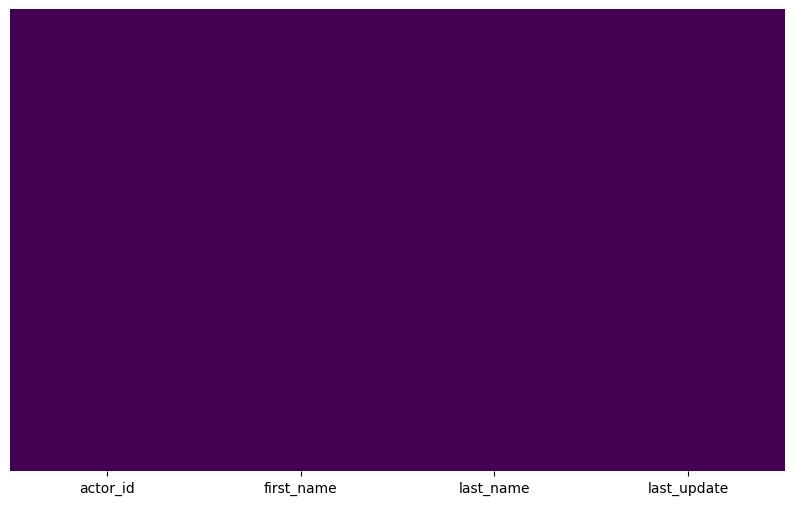

In [9]:
ckna(acdf)

In [10]:
new_acdf = acdf.drop_duplicates()

From actors table there should be not much to clean or even do. It seems there are not nulls so I don't believe we should much for now. Lets jump to the next table: Category.

In [ ]:
catdf.head()

In [ ]:
catdf.info()

In [ ]:
catdf.value_counts()    #I do this to check that there are not duplicated entries.

In [ ]:
ckna(catdf)

In [ ]:
new_catdf = catdf.drop_duplicates()

In [ ]:
new_catdf.shape

Categories dataset seems to be also quite clean, so once again we can skip to the next table. 
On a side note, I would like to check if the data frame which covers the films could have the category_ID so I can link it to this one in the future.

Next table: languages!

In [ ]:
langdf.head()

In [ ]:
langdf.info()

In [ ]:
langdf.value_counts()

Perhaps it could be useful to add some more rows regarding more langauges, such as:
- Spanish: language_id: 7 
- Korean: language_id: 8
- Indian: language_id: 9

In [ ]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
new_rows = pd.DataFrame({'language_id': [7, 8, 9, 10, 0], 'name': ['Spanish', 'Portuguese', 'Korean', 'Indian', 'unknown'], 'last_update': [current_time, current_time, current_time, current_time, current_time]})

In [ ]:
new_rows

In [ ]:
newlangdf = pd.concat([langdf, new_rows], ignore_index=True)
newlangdf

In [ ]:
ckna(newlangdf)

Let's check now those dataframes where I want to do some changes.
As a little reminder:

- Film: improve the language-relevant columns. Currently, the original language column has no values and the rental language is English for all. It would be interesting to introduce values relevant to the languages in which you can watch the movie. Nowadays and with the DVD format you can choose the type of language. 

  I would also like to be able to introduce two new columns with the info relevant to the category (category_ID) and the people acting (actor_id).

In [ ]:
filmdf.head()

In [ ]:
filmdf.info()

In [ ]:
ckna(filmdf)

In [ ]:
filmdf = filmdf.fillna(1)   #en otro mundo hubiera pillado la info relevante al pais de la peli para poner el idioma pero como no tengo esa info y las pelis son inventadas pues pongo el mismo idioma.

In [ ]:
categorydf = pd.merge(filmdf, hdddf, on='title', how='left')

In [ ]:
categorycolumn = categorydf['category_id']
categorycolumn
filmdf['category_id'] = categorycolumn

In [ ]:
filmdf.head()

As we can see, my new columns work but the values have a float type that I am not keen on, so I am going to change them into int64.

In [ ]:
filmdf.dtypes

In [ ]:
filmdf['original_language_id'] = filmdf.original_language_id.astype('int64')

In [ ]:
filmdf = filmdf.fillna(0)

In [ ]:
filmdf['category_id'] = filmdf.category_id.astype('int64')

In [ ]:
filmdf.head()

Next data frame is INVENTORY:

In [ ]:
invdf.head()

In [ ]:
invdf.store_id.unique()

In [ ]:
len(invdf.inventory_id.unique())

In [ ]:
len(invdf.film_id.unique())

We can see the movies in each store and therefore we can check how many there are and where to find them.

As we can see, there are only two store IDs so I am going to take into consideration that there are two stores and that this table would help me check if there are any available copies in case someone asks.

Alse we see that there are a total of 1000 movies in the videoclub, well, being honest there are 1000 copies. Because individual movies there are only 207 movies.

In [ ]:
invdf.groupby(['film_id', 'store_id']).count()['inventory_id'] #whith a simple groupby I can check the amount of copies of each film in each store.

In [ ]:
newinventorydf = invdf.drop_duplicates()

In [ ]:
ckna(newinventorydf)

Let's have a look at the old database:
OLD_HDD is a table with some info regarding movies and the actors that played the part. 

In [ ]:
hdddf.head()

It comes with the movie title and it's category. It could be usefull to add a new column with the actor_id so I can link it to the film table and therefore I can have the list of actors and their movies.

In [ ]:
hdddf['name'] = hdddf[['first_name', 'last_name']].agg(' '.join, axis=1)
hdddf.head()

In [ ]:
acdf['name'] = acdf[['first_name', 'last_name']].agg(' '.join, axis=1)
acdf.head()

In [ ]:
actorshdd = pd.merge(hdddf, acdf, on='name', how='left')
actorshdd.head()

In [ ]:
hdddf['actor_id'] = actorshdd['actor_id']
hdddf.head()

This way I can link it now to the film table and add the actor ID. Why? Because sometimes people wants to watch movies from an actor who they like.

In [ ]:
actorID = pd.merge(filmdf, hdddf, on='title', how='left')
actorID.head()

In [ ]:
filmdf['actor_id'] = actorID['actor_id']
filmdf.head()

In [ ]:
filmdf['actor_id']=filmdf.actor_id.fillna(0)
filmdf['actor_id'] = filmdf.actor_id.astype('int64')
filmdf.info()

In [ ]:
new_filmdf = filmdf.drop_duplicates()

We can check now if the hdddf has any Null values and if there are any duplicates and if it is ok we can export it at the end.

In [ ]:
new_hdddf = hdddf.drop_duplicates()

In [ ]:
ckna(new_hdddf)

Let's have a look at the rental table before creating our customer, store and staff tables.

In [ ]:
rentdf.head()

As we can see, there is a rentalID which gives us a code to retrieve, a rental date and a return date, the inventoryID to see the direct copy of the movie the customer took home, the customer who took it and the last time it was updated.

This table works as an invoice for any other store, you have the client, the product, the when, where and who assisted. It could be cool if this table could help to check whose client are more or less inclined to return the movies late. Let's say for the shake of it, that we have a return policy or 3 days. Anybody who returns the movie after those first three days would be late and therefore can be labeled as such.

In [ ]:
rentdf = rentdf.reindex(columns=['rental_id', 'inventory_id', 'customer_id', 'staff_id','rental_date','return_date','last_update'])
rentdf.head()


In [ ]:
rentdf['rental_date'] = pd.to_datetime(rentdf['rental_date'])
rentdf['return_date'] = pd.to_datetime(rentdf['return_date'])


In [ ]:
rentdf['rental_time'] = rentdf.rental_date.dt.time
rentdf['rental_date'] = rentdf.rental_date.dt.date
rentdf.head()

In [ ]:
rentdf['return_time'] = rentdf.return_date.dt.time
rentdf['return_date'] = rentdf.return_date.dt.date
rentdf.head()

In [ ]:
rentdf = rentdf.reindex(columns=['rental_id', 'inventory_id', 'customer_id', 'staff_id','rental_date','rental_time','return_date','return_time','last_update'])
rentdf.head()

There is something bothering me here. If you check the inventory_id, it looks quite odd the fact that you have id numbers over 1000 when we already checked the inventory files and it only has about a thousand inventory IDs. I think this must be wrong and for the shake of the exercise I am going to change those in order to match the inventory table.

In [ ]:
import random
def inventory_change(inventoryID):
    return random.randint(1,1000)
    

In [ ]:
rentdf['inventory_id'] = rentdf.inventory_id.apply(inventory_change)
rentdf.head()

And I am going to do the same with the customers ID column. I will create later on the tables relating to the customers, staff and stores but I can start limiting the amount of customers I have between the two stores by a 100.

In [ ]:
def customer_change(customerID):
    return random.randint(1,100)

In [ ]:
rentdf['customer_id'] = rentdf.inventory_id.apply(customer_change)
rentdf.head()

In [ ]:
rentdf.shape

In [ ]:
new_rentdf = rentdf.drop_duplicates()

My rental table is complete, so now the last things to do are to create the tables regarding: clients, staff and stores.

I am going to start with the stores table, it is the simplest out of the three and also it is good as practice.

In [ ]:
stores={'Store_ID': [1,2], 'Address': ['C/ de Hortaleza, 69, 28004 Madrid','C/ de García de Paredes, 33, 28010 Madrid'], 'Phone':[666666666,888888888], 'email':['8filmshortaleza@8films.com','8filmsparedes@8films.com']}

storesdf = pd.DataFrame(stores)
storesdf.head()

It looks ok and for now, this will help to create a new link in our database. 

Let's continue with the tables regarding staff and customers. For the staff I am only going to hire 4 people, 2 for each store. And for that I am going to use a library that some colleagues have found: Faker.

In [ ]:
from faker import Faker

In [ ]:
def random_staff(num_staff):
    fake = Faker()
    domain = "8films.com"
    staff = []

    
    for i in range(num_staff):
        staff_id = i
        full_name = fake.name()
        surname, name = full_name.split(" ")
        address = fake.address()
        phone = fake.phone_number()
        email = f"{name.replace(' ', '.')}@{domain}"
        staff.append({"staff_id": staff_id, "name": name, "surname": surname, "address": address, "phone": phone, "email": email})
    
    return staff

staff = random_staff(4)

staff

In [ ]:
staffdf = pd.DataFrame(staff)
staffdf

And here we have our amazingly willing staff members.

Lets get some clients, shall we?

In [ ]:
def random_customers(num_customers):
    fake = Faker()
    domain = "gmail.com"
    customers = []
    
    for i in range(num_customers):
        id = i
        full_name = fake.name()
        address = fake.address()
        phone = fake.phone_number()
        email = f"{full_name.replace(' ', '.')}@{domain}"
        customers.append({"customer_id": id, "name": full_name, "address": address, "phone": phone, "email": email})
    
    return customers

customers = random_customers(100)

In [ ]:
customersdf = pd.DataFrame(customers)
customersdf.head()

Now we can export our new tables one by one and import those into MySQL Workbench.

In [11]:
new_acdf.to_csv('../DATA/CLEAN/clean_actors.csv')

In [ ]:
new_catdf.to_csv('../DATA/CLEAN/clean_catalogue.csv')

In [ ]:
newlangdf.to_csv('../DATA/CLEAN/clean_language.csv')

In [ ]:
newinventorydf.to_csv('../DATA/CLEAN/clean_inventory.csv')

In [ ]:
new_hdddf.to_csv('../DATA/CLEAN/clean_hdddf.csv')

In [ ]:
new_filmdf.to_csv('../DATA/CLEAN/clean_films.csv')

In [ ]:
new_rentdf.to_csv('../DATA/CLEAN/clean_rental.csv')

In [ ]:
storesdf.to_csv('../DATA/CLEAN/clean_stores.csv')

In [ ]:
staffdf.to_csv('../DATA/CLEAN/clean_staff.csv')

In [ ]:
customersdf.to_csv('../DATA/CLEAN/clean_customers.csv')